In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-colorblind')

import os
print(os.listdir("../input"))

['bank-additional-names.txt', 'bank-additional-full.csv']


In [2]:
df = pd.read_csv("../input/bank-additional-full.csv",sep=';')
data =  df.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
X_label = LabelEncoder()

df['job'] = X_label.fit_transform(df['job'])
df['marital'] = X_label.fit_transform(df['marital'])
df['education'] = X_label.fit_transform(df['education'])
df['default'] = X_label.fit_transform(df['default'])
df['housing'] = X_label.fit_transform(df['housing'])
df['loan'] = X_label.fit_transform(df['loan'])
df['contact'] = X_label.fit_transform(df['contact'])
df['month'] = X_label.fit_transform(df['month'])
df['day_of_week'] = X_label.fit_transform(df['day_of_week'])
df['poutcome'] = X_label.fit_transform(df['poutcome'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:

y = (pd.get_dummies(data['y'], columns = ['y'], prefix = 'y', drop_first = True)).values
type(y)
y[:5]
y = np.ravel(y)
y[:4]

array([0, 0, 0, 0], dtype=uint8)

In [5]:
df.drop(columns=['y'],inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [6]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [7]:
X_train,X_valid,y_train,y_valid = train_test_split(df,y,test_size=0.3,random_state=42)

In [8]:
print('Shape of Training set : ' , [X_train.shape,y_train.shape])
print('Shape of Validation set : ' , [X_valid.shape,y_valid.shape])

Shape of Training set :  [(28831, 20), (28831,)]
Shape of Validation set :  [(12357, 20), (12357,)]


In [10]:
log_clf = LogisticRegression().fit(X_train,y_train)

log_pred = log_clf.predict(X_valid)

print('Training score : ' , log_clf.score(X_train,y_train))
Training_score_log = log_clf.score(X_train,y_train)
 
print('Validation score : ' , round(log_clf.score(X_valid,y_valid),2))
Validation_score_log = log_clf.score(X_valid,y_valid)

print("Accuracy:",accuracy_score(y_valid, log_pred))
Accuracy_log = accuracy_score(y_valid, log_pred)
print("Precision:",precision_score(y_valid, log_pred))
Precision_log = precision_score(y_valid, log_pred)
print("Recall:",recall_score(y_valid, log_pred))
Recall_log = recall_score(y_valid, log_pred)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training score :  0.9088827997641428
Validation score :  0.91
Accuracy: 0.9120336651290767
Precision: 0.6776470588235294
Recall: 0.4146868250539957


In [11]:
CONFMTX = confusion_matrix(y_valid,log_pred)
CONFMTX

array([[10694,   274],
       [  813,   576]])

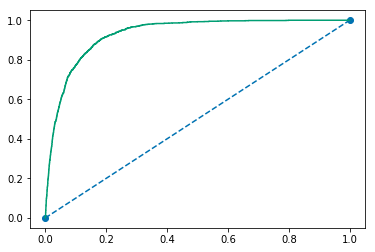

In [12]:
%matplotlib inline
y_pred_proba  = log_clf.predict_proba(X_valid)[::,1]
FPR,TPR,threshold = roc_curve(y_valid,y_pred_proba)
auc_log = roc_auc_score(y_valid,y_pred_proba)
plt.plot([0,1],[0,1],'o--');
plt.plot(FPR,TPR,label='data 1, auc='+str(auc_log));
plt.show()

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=20).fit(X_train,y_train)

knn_pred = knn_clf.predict(X_valid)

print('Training score : ' , knn_clf.score(X_train,y_train))
Training_score_knn = knn_clf.score(X_train,y_train)

print('Validation score : ' ,(knn_clf.score(X_valid,y_valid)))
Validation_score_knn = knn_clf.score(X_valid,y_valid)

print("Accuracy:",accuracy_score(y_valid, knn_pred))
Accuracy_knn = accuracy_score(y_valid, knn_pred)

print("Precision:",precision_score(y_valid, knn_pred))
Precision_knn = precision_score(y_valid, knn_pred)

print("Recall:",recall_score(y_valid, knn_pred))
Recall_knn = recall_score(y_valid, knn_pred)

Training score :  0.9166522146300857
Validation score :  0.9121145909201263
Accuracy: 0.9121145909201263
Precision: 0.6553846153846153
Recall: 0.46004319654427644


In [14]:
y_pred_proba  = knn_clf.predict_proba(X_valid)[::,1]
auc_knn = roc_auc_score(y_valid,y_pred_proba)

In [15]:
tree_clf = DecisionTreeClassifier().fit(X_train,y_train)

tree_pred = tree_clf.predict(X_valid)

print('Training score : ' , tree_clf.score(X_train,y_train))
Training_score_tree = tree_clf.score(X_train,y_train)

print('Validation score : ' ,(tree_clf.score(X_valid,y_valid)))
Validation_score_tree = tree_clf.score(X_valid,y_valid)

print("Accuracy:",accuracy_score(y_valid, tree_pred))
Accuracy_tree = accuracy_score(y_valid, tree_pred)

print("Precision:",precision_score(y_valid, tree_pred))
Precision_tree = precision_score(y_valid, tree_pred)

print("Recall:",recall_score(y_valid, tree_pred))
Recall_tree = recall_score(y_valid, tree_pred)

y_pred_proba  = tree_clf.predict_proba(X_valid)[::,1]
auc_tree = roc_auc_score(y_valid,y_pred_proba)

Training score :  1.0
Validation score :  0.8895362952172857
Accuracy: 0.8895362952172857
Precision: 0.5085348506401138
Recall: 0.5147588192944564


In [16]:
rf_clf = RandomForestClassifier().fit(X_train,y_train)

rf_pred = rf_clf.predict(X_valid)

print('Training score : ' , rf_clf.score(X_train,y_train))
Training_score_rf = rf_clf.score(X_train,y_train)

print('Validation score : ' ,(rf_clf.score(X_valid,y_valid)))
Validation_score_rf = rf_clf.score(X_valid,y_valid)

print("Accuracy:",accuracy_score(y_valid, rf_pred))
Accuracy_rf = accuracy_score(y_valid, rf_pred)

print("Precision:",precision_score(y_valid, rf_pred))
Precision_rf = precision_score(y_valid, rf_pred)

print("Recall:",recall_score(y_valid, rf_pred))
Recall_rf = recall_score(y_valid, rf_pred)

y_pred_proba  = rf_clf.predict_proba(X_valid)[::,1]
auc_rf = roc_auc_score(y_valid,y_pred_proba)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training score :  0.9933405015434775
Validation score :  0.9086347819049931
Accuracy: 0.9086347819049931
Precision: 0.6329243353783232
Recall: 0.4456443484521238


In [22]:
#lets create a dataframe
Models= pd.DataFrame({'Training_Score':[Training_score_log,Training_score_knn,Training_score_tree,Training_score_rf]
,'Validation_score' : [Validation_score_log,Validation_score_knn,Validation_score_tree,Validation_score_rf]
,'Accuracy' : [Accuracy_log,Accuracy_knn,Accuracy_tree,Accuracy_rf]
,'Precision' : [Precision_log,Precision_knn,Precision_tree,Precision_rf]
,'Recall' : [Recall_log,Recall_knn,Recall_tree,Recall_rf]
,'AUC' : [auc_log,auc_knn,auc_tree,auc_rf]},index=['Logistic Regression','KNN','Decision Tree','Random Forest'])
Models

,Training_Score,Validation_score,Accuracy,Precision,Recall,AUC
Logistic Regression,0.908883,0.912034,0.912034,0.677647,0.414687,0.929748
KNN,0.916652,0.912115,0.912115,0.655385,0.460043,0.926332
Decision Tree,1.000000,0.889536,0.889536,0.508535,0.514759,0.725879
Random Forest,0.993341,0.908635,0.908635,0.632924,0.445644,0.919950


Now based on the above chart we can decide if we need a model which has more accuracy i.e. it predicts more true positive or we need recall to be high.
There are various factor in the above chart which willl help you understand the Models in more broader aspects.